# 16IT146 &emsp; &emsp;  &emsp;  &emsp;  &emsp;  &emsp;    IT441: Data Science

## **Practical 2 : Data Preprocessing: Data types, Missing Values, Encodings, Scaling, Imbalance dataset handling techniques**

In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

import os

In [4]:
df = pd.read_csv("LoanPrediction.csv")

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.describe() #info in form of statistical details

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.info() #concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
#differentiating numeric and categorial features
numeric_features = df.select_dtypes(include = ['int64', 'float64']).columns
categorical_features = df.iloc[:, 0:12].select_dtypes(include = ['object']).columns

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Categorical features: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


In [9]:
df.isnull().sum() #checking null values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [57]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64


In [56]:
fullData = pd.read_csv("LoanPrediction.csv")
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)

fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

In [59]:
print(fullData['Gender'].value_counts())
print(fullData['Married'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64


In [11]:
fullData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [42]:
medianData = pd.read_csv("LoanPrediction.csv")
#Imputing Missing values with median for continuous variable
medianData['LoanAmount'].fillna(medianData['LoanAmount'].median(), inplace=True)

medianData['Loan_Amount_Term'].fillna(medianData['Loan_Amount_Term'].median(), inplace=True)
medianData['ApplicantIncome'].fillna(medianData['ApplicantIncome'].median(), inplace=True)
medianData['CoapplicantIncome'].fillna(medianData['CoapplicantIncome'].median(), inplace=True)

#Imputing Missing values with mode for categorical variables
medianData['Gender'].fillna(medianData['Gender'].mode()[0], inplace=True)
medianData['Married'].fillna(medianData['Married'].mode()[0], inplace=True)
medianData['Dependents'].fillna(medianData['Dependents'].mode()[0], inplace=True)
medianData['Loan_Amount_Term'].fillna(medianData['Loan_Amount_Term'].mode()[0], inplace=True)
medianData['Credit_History'].fillna(medianData['Credit_History'].mode()[0], inplace=True)
medianData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
fullData.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
medianData.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

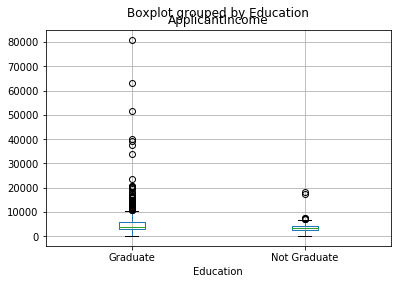

In [16]:
fullData.boxplot(column='ApplicantIncome' ,by='Education')

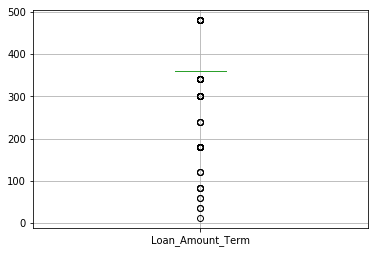

In [17]:
fullData.boxplot(column='Loan_Amount_Term')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009AD8470>,
      dtype=object)

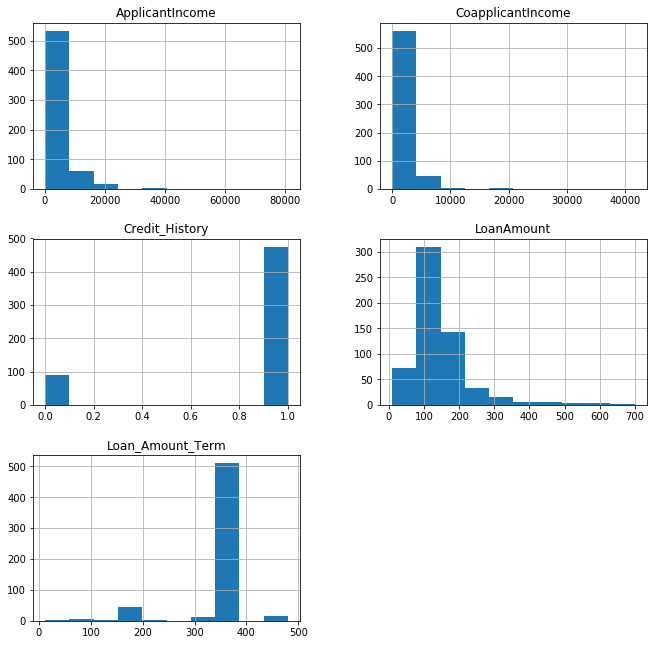

In [19]:
#MinMax Scaling
#dataframe_minmax = pd.read_csv("LoanPrediction.csv")
min_max=MinMaxScaler()
dataframe_minmax[dataframe_minmax.dtypes[(dataframe_minmax.dtypes=="float64")|(dataframe_minmax.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [29]:
#standard scaling
from sklearn.preprocessing import scale
dataframe_minmax=scale(fullData[['ApplicantIncome', 'CoapplicantIncome',
                'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])

In [60]:
#Label Encoding
le=LabelEncoder()
for col in medianData.columns.values:
       # Encoding only categorical variables
    if medianData[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
        data=medianData[col].append(medianData[col])

In [48]:
medianData['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [61]:
medianData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [68]:
#One Hot Encoder
enc=OneHotEncoder(sparse=False)
fullData_1 = fullData
columns=['Gender', 'Married', 'Dependents', 'Education',
          'Credit_History', 'Property_Area']
for col in columns:
    # creating an exhaustive list of all possible categorical values
    data=fullData_1[[col]]
    enc.fit(data)
    # Fitting One Hot Encoding on train data
    temp = enc.transform(fullData[[col]])
    # Changing the encoded features into a data frame with new column names
    temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
        .value_counts().index])
    # In side by side concatenation index values should be same
    # Setting the index values similar to the X_train data frame
    temp=temp.set_index(fullData.index.values)
    # adding the new One Hot Encoded varibales to the train data frame
    fullData_1=pd.concat([fullData_1,temp],axis=1)
fullData_1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Credit_History_1.0,Credit_History_0.0,Property_Area_Semiurban,Property_Area_Urban,Property_Area_Rural
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


<b>Conclusion:</b> In this practical I have performed data pre-processing on Loan Prediction dataset, data pre-processing includes data types, imputing the missing values, used standard scaling, and also performed label encoding and one hot encoding on the dataset.